# Lending Club Case Study.

### Lets see what data we have !

In [3]:
#import pandas library to read csv data
import pandas as pd

#read the file using read_csv and create a dataframe
loan = pd.read_csv('loan.csv')

#Display first 5 rows, to get an idea what data looks like
loan.head()

C:\Users\sadhn\AppData\Local\Temp\ipykernel_17844\3831609767.py:5: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Understand the data via data dictionary


### Notes from the DataDictionary:
- **Reject Stats** has dictionary about the loans that were rejected, we don't have data for it, so we can ignore it

- **Loan Stats** has 115 variables. Here are some broad categories at first look at the data dictionary.

    - _ID_ variables : Unique values assinged to loan listing and customer.
    - _application_type, policy code_ : will be useful in segregating the data.
    - *Customer* Employment, Income/verification status, home ownership, Address State, Zipcode,title : to categorise customers
    - *Loan* amount, , interest rate, installment, purpose, term : To categorise loan
    - *Number* of accounts based on different types : we can try checking if this has a relation with loan repayment.
    - Variables related to *chargeoff*, balance, FICO, loan status, grade, mortgage, dti (dept payment/income ratio), outstanding principal bankruptcies etc. : these can indicate directly about loan repayment of a customer.
    Loan status will be used to get suset of data relevent for our study, we can ignore the current borrowers.
    - *Collection*, payment realted, Percent of trader never delinquent, recoveries, delinquency, Balance : These also look like current borrowers variable, if so we can ignore them as well.
    - *Months since* different activities were carried out by a customer : It may also not be an important factor for our study.
    - *Aggregate(Total)* of different values (like balance, collections, Interest, Late fees) etc. These are mostly realted to current borrower again.
    
#### This way it becomes easy to get an overall idea about the kind of data we have and what data is relevant for our study.

Important variable to look out will be ids, loan status, Grade, SubGrade, Customer, loan info etc.

### First lets clean the data

1. Drop Nulls

In [4]:
#Lets see how many nulls or missing records we have
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [5]:
# As there are many fields with Null data, we will check if they can be dropped if significant %age of data is missing.
print('Total rows,columns =',loan.shape)

loan[loan.columns].isnull().sum()


Total rows,columns = (39717, 111)


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
# Drop columns which are nulls
loan_drop1=loan.dropna(how='all',axis=1)

In [183]:
# Check number of columns after dropping the nulls
loan_drop1.shape

#57/111 are useful now, this has reduced the data to be analysed by almost 50%

(39717, 57)

In [186]:
# Let's see if we still have nulls
loan_drop1.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [8]:
loan_drop1[loan_drop1.columns].isnull().sum().sort_values(ascending=False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv             

In [9]:
# Still there are columns with most data as nulls, lets drop first 3 columns too
loan_drop2=loan_drop1.drop(columns=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'])

In [201]:
loan_drop2.shape

(39717, 54)

2. Drop rows with all nulls

In [10]:
loan_drop3 = loan_drop2.dropna(how='all')

In [209]:
loan_drop3.shape
#No row dropped

(39717, 54)

3. Identify the missing values

In [284]:
loan_drop3[['desc','emp_title','emp_length','pub_rec_bankruptcies','last_pymnt_d','chargeoff_within_12_mths','collections_12_mths_ex_med','revol_util','tax_liens','title','last_credit_pull_d']].describe()

,pub_rec_bankruptcies,chargeoff_within_12_mths,collections_12_mths_ex_med,tax_liens
count,39020.000000,39661.0,39661.0,39678.0
mean,0.043260,0.0,0.0,0.0
std,0.204324,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0
50%,0.000000,0.0,0.0,0.0
75%,0.000000,0.0,0.0,0.0
max,2.000000,0.0,0.0,0.0


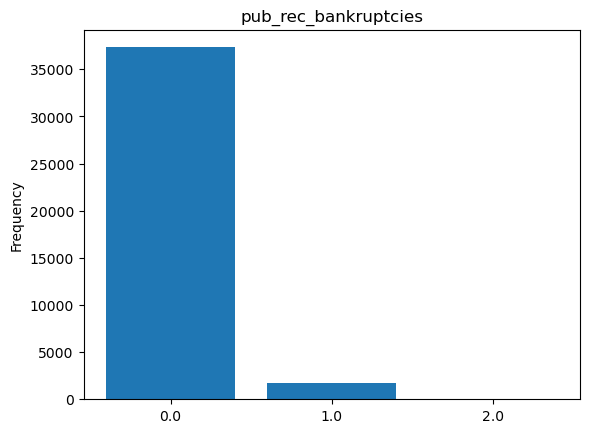

pub_rec_bankruptcies: 
 0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


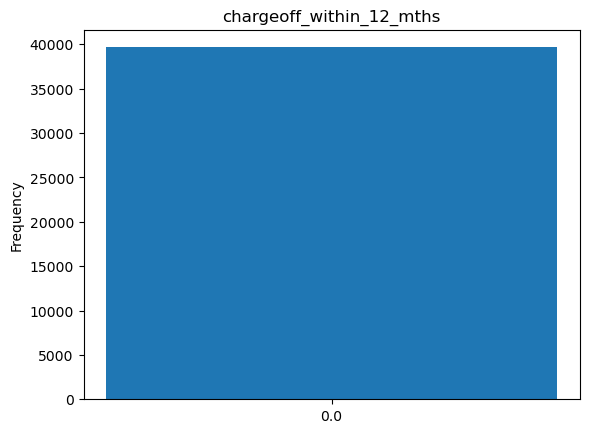

chargeoff_within_12_mths: 
 0.0    39661
Name: chargeoff_within_12_mths, dtype: int64


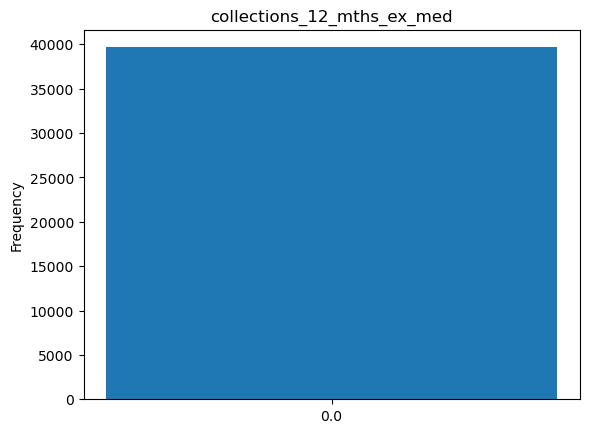

collections_12_mths_ex_med: 
 0.0    39661
Name: collections_12_mths_ex_med, dtype: int64


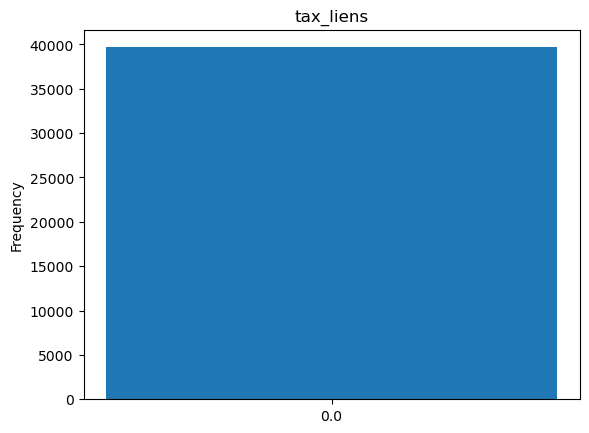

tax_liens: 
 0.0    39678
Name: tax_liens, dtype: int64


In [312]:
# For the numeric fields above, we will just show what could be the possible missing values but not imput it.

import matplotlib.pyplot as plt
for vars in ['pub_rec_bankruptcies','chargeoff_within_12_mths','collections_12_mths_ex_med','tax_liens']:
    var=loan_drop3[vars]
    varValue = var.value_counts()
    plt.bar(varValue.index, varValue)
    plt.ylabel("Frequency")
    plt.xticks(varValue.index, varValue.index.values)
    plt.title(vars)
    plt.show()
    print("{}: \n {}".format(vars,varValue))


**pub_rec_bankruptcies** : Number of bankruptcies we have is either 0, 1 or 2. 94% do not have a recorded bankrupcy. If we have to assign a missing value for it, it would be 0 (median).

**chargeoff_within_12_mths** : Number of charge offs (Defaults) in last 12 months.
99.85% people have 0, again we can take 0 to fill the missing values.

**collections_12_mths_ex_med** : Number of collections in last 12 months, excluding the mediacal ones.
It has same details as chargeoff_within_12_mths

**tax_liens** : Number of tax liens, or legal claims against the assets of a customer who fails to pay taxes owed. This can be filled with 0 for missing values as 99.9% values are 0

In [353]:
# Lets see the distinct values for other (non-numerical) missing values - 'desc','emp_title','emp_length','last_pymnt_d','revol_util','title','last_credit_pull_d'

for var in ['desc','emp_title','emp_length','last_pymnt_d','revol_util','title','last_credit_pull_d']:
    print('Count of unique values for {} :'.format(var), loan_drop3[var].unique().shape[0])

    # It wont make sense to fill up missing values where there are lot of disctinct values.
    # About employee length last payment and last credit pull date, we can try to identify the missing values by first manupulating the data


Count of unique values for desc : 26528
Count of unique values for emp_title : 28821
Count of unique values for emp_length : 12
Count of unique values for last_pymnt_d : 102
Count of unique values for revol_util : 1090
Count of unique values for title : 19616
Count of unique values for last_credit_pull_d : 107


In [354]:
#Take a look at what data we have for the missing fields
loan_drop3[['desc','emp_title','emp_length','last_pymnt_d','revol_util','title','last_credit_pull_d']]

,desc,emp_title,emp_length,last_pymnt_d,revol_util,title,last_credit_pull_d
0,Borrower added on 12/22/11 > I need to upgra...,NaN,10+ years,Jan-15,83.70%,Computer,May-16
1,Borrower added on 12/22/11 > I plan to use t...,Ryder,< 1 year,Apr-13,9.40%,bike,Sep-13
2,NaN,NaN,10+ years,Jun-14,98.50%,real estate business,May-16
3,Borrower added on 12/21/11 > to pay for prop...,AIR RESOURCES BOARD,10+ years,Jan-15,21%,personel,Apr-16
4,Borrower added on 12/21/11 > I plan on combi...,University Medical Group,1 year,May-16,53.90%,Personal,May-16
...,...,...,...,...,...,...,...
39712,Our current gutter system on our home is old a...,FiSite Research,4 years,Jul-10,13.10%,Home Improvement,Jun-10
39713,The rate of interest and fees incurred by carr...,"Squarewave Solutions, Ltd.",3 years,Jul-10,26.90%,Retiring credit card debt,Jul-10
39714,NaN,NaN,< 1 year,Apr-08,19.40%,MBA Loan Consolidation,Jun-07
39715,NaN,NaN,< 1 year,Jan-08,0.70%,JAL Loan,Jun-07


 ### Before going further:
 Lets see if there are any more variables that we dont need and what are we left with finally

In [359]:
loan_drop3.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

## Define the columns and see their relevence for business/Case Study

_Marked the ones that are irrelevent in <font color='red'>red</font>._
    
<font color='red'> 1. **id** : Unique ID for a loan listing. This won't be of help in our analysis as each row in our data has a different value.</font>
<br><font color='red'> 2. **member_id** : Unique ID for a borrower. This won't be of help in our analysis as each row in our data has a different value</font>
<br>3. **loan_amnt** : Loan amount that was applied for by the borrower.
<br>4. **funded_amnt** : Loan amount committed by LendingClub. It may not be same as the amount that was applied for.
<br>5. **funded_amnt_inv** : Loan amount committed by investors. It can also different from funded amount, depending on vendors preference.
<br>6. **term** : Number of payments in months for the loan. Its either 36 or 60. This needs to be verified if our data is as expected.
<br>7. **int_rate** : Rate of interest on the loan that borrower needs to pay. This will have '%' sign, that can be removed to make it float for our analysis.
<br>8. **installment** : Monthly payment that the borrower needs to pay for the term of loan.
<br>9. **grade** : 7 categories from A to G, created based on cedit score and other indicators of credit risk. A has the lowest risk and volatility and hence the least rate of interest; and it increases as we go to G grade.
<br>10. **sub_grade** : Each grade is further divided into 5 more categories from 1 to 5, so grade A1 will have the least rate of interest and A5 the most under grade A, similiary for other grades.
<br>11. **emp_title** : Job Tile of the Borrower till Sep-23-2013, which became Employer Name after that. This can be kept to see if there is any relation for defaulters risk.
<br>12. **emp_length** : Years for how long the borrower has been employed. This needs to be between 0 to 10, where 0 means less than a year of employment and 10 means 10 or more years. We can again check if the data is as expected.
<br>13. **home_ownership** : Tells the home ownership status of the borrower, it can be RENT, OWN, MORTGAGE, OTHER. Few have NONE as well.
<br>14. **annual_inc** : Annual income as provided by the borrower. We can look for outliers in this and identify them
<br>15. **verification_status** : Indicates whether the borrowers income was verified or income source was verified. It can have values 'Verified', 'Source Verified' or 'Not Verified'.
<br>16. **issue_d** : month in which the loan was funded. The data has Mon-YY format, we will sepearte month and year.
<br color='red'>17. **loan_status** : Status of the load - 'Fully Paid', 'Charged Off', 'Current'. We will not be interested in Current as, the data needed for deciding the risk will not be present in Current status. We need to study the characterstics of Fully paid and charged off.
<br><font color='red'>18. **pymnt_plan** : Indicates if a paymnet plan has been put in place for the loan. As we will see the data, its all 'n' so the variable is useless for us.
<br><font color='red'>19. **url** : URL of Lending Club page of the loan listing based on loan ID. Its unique for each row, so not of value to our case.</font>
<br><font color='red'>20. **desc** : Descrition provided by the borrower, this will be difficult to aggregate or take meaning out of it as it is like a comment about the loan by the borrower, so dropping it.</font>
<br><font color='black'>21. **purpose** : Category of loan provided by the borrower, we have 14 distinct categories.</font>
<br><font color='red'>22. **title** : The loan title provided by the borrower, its similar to purpose so we will drop this.
<br><font color='black'>23. **zip_code** : The first 3 numbers of the zip code provided by the borrower in the loan application. The zip codes are distributed, we will keep it to see if we find any patterns. Lets clean up and remove xx from the data and have only first 3 digits.
<br>24. **addr_state** : The state provided by the borrower in the loan application.
<br>25. **dti** : Gives the ratio of debt paid to total income for a given month. Higher value is good.
<br><font color='red'>26. **delinq_2yrs** : Number of 30+ days past dues cases in past 2 years. Not available at the time of loan application so ignore.
<br>27. **earliest_cr_line** : First reported credit line month of the borrower.Not available at the time of loan application so ignore.
<br>28. **inq_last_6mths** : The number of inquiries in past 6 months (excluding auto and mortgage inquiries). Not available at the time of loan application so ignore.
<br>29. **open_acc** : The number of open credit lines in the borrower's credit file. Not available at the time of loan application so ignore.
<br>30. **pub_rec** : Number of derogatory public records.Most of them have 0 records, we can ignore this from our analysis
<br>31. **revol_bal** : Total credit revolving balance.Not available at the time of loan application so ignore.
<br>32. **revol_util** : Amount of credit the borrower is using relative to all available revolving credit, again its for current borrower.
<br>33. **total_acc** : The total number of credit lines currently in the borrower's credit file, ignoring as its for current borrower.
<br>34. **initial_list_status** : The initial listing status of the loan. Possible values are – W, F. All are 'f' so ignoring it
<br>35. **out_prncp** : Remaining outstanding principal for total amount funded, not applicable for non-current borrowers.
<br>37. **out_prncp_inv** : Remaining outstanding principal for portion of total amount funded by investors, not applicable for non-current borrowers.
<br>38. **total_pymnt** : Payments received to date for total amount funded, not applicable for non-current borrowers.
<br>39. **total_pymnt_inv,** : Payments received to date for portion of total amount funded by investors, not applicable for non-current borrowers.
<br>40. **total_rec_prncp** : Principal received to date, not applicable for non-current borrowers.
<br>41. **total_rec_int** : Interest received to date, not applicable for non-current borrowers.
<br>42. **total_rec_late_fee** : Late fees received to date, not applicable for non-current borrowers.
<br>43. **recoveries,** : Post charge off gross recovery, mostly 0 for non-current borrowers, can be ignored.
<br>44. **collection_recovery_fee** : Post charge off collection fee, same as above.
<br>45. **last_pymnt_d** : Month when last payment was received. Not of use for our case.
<br>46. **last_pymnt_amnt,** : Last total payment amount received. Not of use for our case.
<br>47. **last_credit_pull_d** : The most recent month Lending Club pulled credit for this loan, its for current loan.
<br>48. **collections_12_mths_ex_med** : Number of collections in 12 months excluding medical collections, for current loans.
<br>49. **policy_code,** : publicly available policy_code=1, new products not publicly available policy_code=2.  We have only 1 in our data, so can be ignored.
<br>50. **application_type** : Indicates whether the loan is an individual application or a joint application with two co-borrowers. We haev only INDIVIDUAL, so can be ignored.
<br>51. **acc_now_delinq** : The number of accounts on which the borrower is now delinquent. We have only 0, so can be ignored.
<br>52. **chargeoff_within_12_mths,** : Number of charge-offs within 12 months, We have only 0, so can be ignored.
<br>53. **delinq_amnt** : The past-due amount owed for the accounts on which the borrower is now delinquent. We have only 0, so can be ignored.</font>
<br>54. **pub_rec_bankruptcies** : Number of public record bankruptcies
<br>55. **tax_liens** : Number of tax liens, having  more liens is a bad thing.
       

In [176]:
loan.pub_rec_bankruptcies.value_counts()
#plt.hist(loan_drop4.revol_util)

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [416]:
# Check if the term for loan is either 30 or 60
loan_drop3.term.value_counts()

#The data is correct.

 36 months    29096
 60 months    10621
Name: term, dtype: int64

In [11]:
# Add a new field to represent the Rate of interest without the '%' sign
loan_drop3["int_rate_withoutPercent"]=loan_drop3.int_rate.apply(lambda x: float(x.replace('%','')))


In [473]:
#check if employee lenght variable data is as per the definition
loan_drop3.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [12]:
#Lets update the data to remove year and change <1 to 0 and 10+ to 10. And store it in a different variable
#import regular expression to replace here
import re
loan_drop3["emp_length_cleaned"]=loan_drop3.emp_length.apply(lambda x: str(x).replace('< 1 year','0'))
loan_drop3["emp_length_cleaned"]=loan_drop3.emp_length_cleaned.apply(lambda x: str(x).replace('+',''))
loan_drop3["emp_length_cleaned"]=loan_drop3.emp_length_cleaned.apply(lambda x: str(x).replace('years','year'))
loan_drop3["emp_length_cleaned"]=loan_drop3.emp_length_cleaned.apply(lambda x: str(x).replace('year',''))
loan_drop3["emp_length_cleaned"]=loan_drop3.emp_length_cleaned.apply(lambda x: str(x).replace(' ',''))
#loan_drop3.emp_length_cleaned.astype("int")


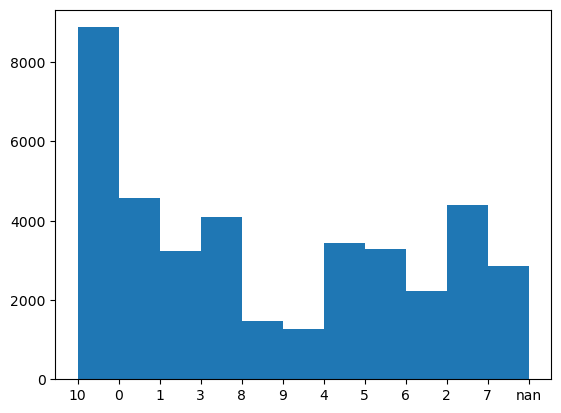

10     8879
0      4583
2      4388
3      4095
4      3436
5      3282
1      3240
6      2229
7      1773
8      1479
9      1258
nan    1075
Name: emp_length_cleaned, dtype: int64

In [550]:
plt.hist(loan_drop3.emp_length_cleaned, bins =11)
plt.show()
loan_drop3.emp_length_cleaned.value_counts()

In [555]:
loan_drop3.home_ownership.value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

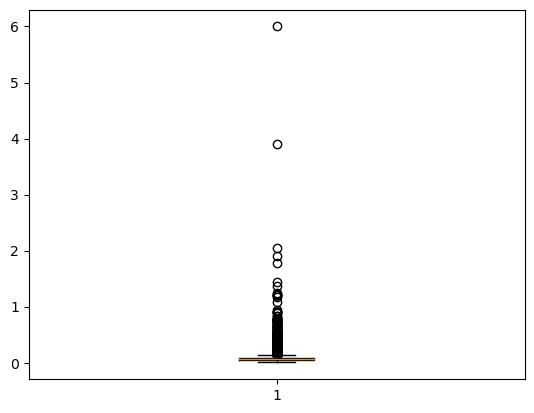

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [566]:
plt.boxplot(loan_drop3.annual_inc/1000000)
plt.show()
loan_drop3.annual_inc.value_counts()
loan_drop3.annual_inc.describe()


In [15]:
loan_drop3["issue_month"]=loan_drop3.issue_d.apply(lambda x: str(x)[0:3])

In [70]:
# Unique value of year is  -07,08,09,10 and 11, so its safe to assume that these are 2007-2011 years
loan_drop3["issue_year"]=loan_drop3.issue_d.apply(lambda x: '20'+str(x)[4:6])

In [71]:
loan_drop3["issue_year"].unique()

array(['2011', '2010', '2009', '2008', '2007'], dtype=object)

In [43]:
loan_drop4=loan_drop3[loan_drop3.loan_status != 'Current']

In [44]:
loan_drop4.drop(columns=['pymnt_plan','desc'], inplace=True)

C:\Users\sadhn\AppData\Local\Temp\ipykernel_17844\3081891318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_drop4.drop(columns=['pymnt_plan','desc'], inplace=True)


In [55]:
loan_drop4.zip_code=loan_drop4.zip_code.apply(lambda x: str(x)[0:3])

C:\Users\sadhn\AppData\Local\Temp\ipykernel_17844\861748841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_drop4.zip_code=loan_drop4.zip_code.apply(lambda x: str(x)[0:3])


In [96]:
loan_drop4["earliest_cr_line_month"]=loan_drop4.earliest_cr_line.apply(lambda x: str(x)[0:3])

C:\Users\sadhn\AppData\Local\Temp\ipykernel_17844\857167109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_drop4["earliest_cr_line_month"]=loan_drop4.earliest_cr_line.apply(lambda x: str(x)[0:3])


In [138]:
loan_drop3.earliest_cr_line.apply(lambda x: str(x)[4:6]).sort_values().unique()

#The unique value of year is from 01 to 08 and then from 46 to 99. This means that 46 to 99 is from 1900 and 01 to 08 from 2000
loan_drop4["earliest_cr_line_year"]=loan_drop4.earliest_cr_line.apply(lambda x: '20'+str(x)[4:6] if str(x)[4:6][0:1] == '0' else '19'+str(x)[4:6] )

C:\Users\sadhn\AppData\Local\Temp\ipykernel_17844\670273982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_drop4["earliest_cr_line_year"]=loan_drop4.earliest_cr_line.apply(lambda x: '20'+str(x)[4:6] if str(x)[4:6][0:1] == '0' else '19'+str(x)[4:6] )


In [139]:
loan_drop4["earliest_cr_line_year"]

0        1985
1        1999
2        2001
3        1996
5        2004
         ... 
39712    1990
39713    1986
39714    1998
39715    1988
39716    2003
Name: earliest_cr_line_year, Length: 38577, dtype: object

In [140]:
loan_drop4["earliest_cr_line_year"].sort_values().unique()

array(['1946', '1950', '1954', '1956', '1959', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008'], dtype=object)

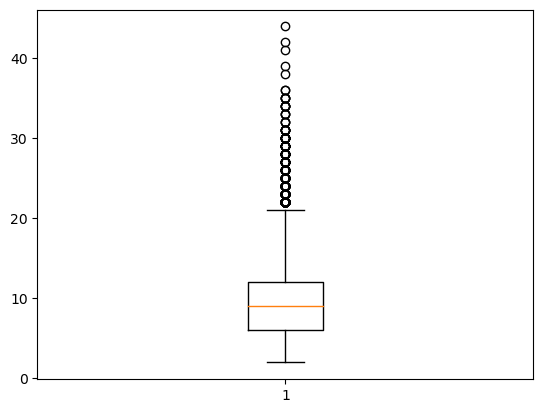

count    38577.000000
mean         9.275423
std          4.401588
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

In [142]:
import matplotlib.pyplot as plt
plt.boxplot(loan_drop4.open_acc)
plt.show()
loan_drop4.open_acc.value_counts()
loan_drop4.open_acc.describe()


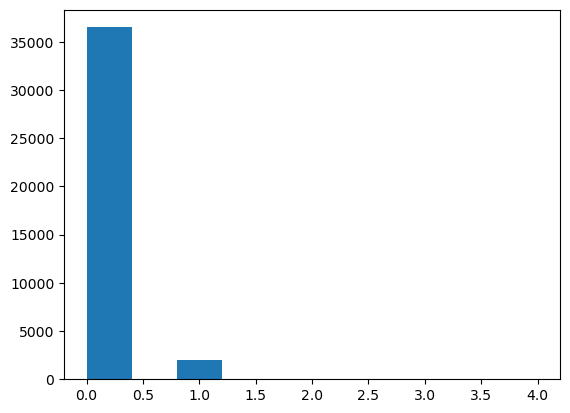

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

In [147]:
plt.hist(loan_drop4.pub_rec)
plt.show()
loan_drop4.pub_rec.value_counts()